In [28]:
import math

# El sistema de colas M/M/c/c

## 1. ¿Qué es?

El sistema de colas M/M/c/c es un sistema exponencial que posee un número limitado de servidores y con pérdidas.

Esto quiere decir que si todos los servidores están ocupados, los próximos trabajos que lleguen serán rechazados (se perderán sin la posibilidad de ser almacenados), por lo que __no existe una cola de espera__.

## 2. ¿Cuándo es utilizado?

Este modelo se adecua a los de una central telefónica, ya que si las llamadas no se pueden recibir debido a que la central está ocupada, la llamada se pierde, y tendremos que volver a llamar para verificar que ya se haya desocupado.

## 3. Sección matemática

### 3.1 Explicación previa

Antes de iniciar, debemos tomar en consideración lo siguiente:

$$
\lambda: \text{Tasa de llegadas constante}
\\
\mu: \text{Tasa de servicio en cada servidor}
$$

### 3.2 Diagramas

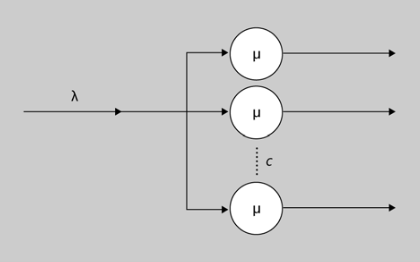

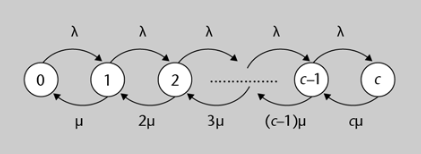

### 3.3 Proceso de nacimiento y muerte

$$
\begin{equation}
\lambda_n =
    \begin{cases}
        \lambda \quad \text{si} \quad n=0, \dots, c-1 
        \\
        0 \quad \text{si} \quad n=c
    \end{cases}
\end{equation}
$$

$$
\mu_n = n \mu, \quad \forall n = 0, \dots, c
$$

### 3.4 Probabilidades de estado

Tomando en cuenta que la __intensidad del tráfico__ está definida como:

$$
a = \frac{\lambda}{\mu}
$$

In [41]:
def intensidad_trafico(lamb, mu):
    return lamb/mu

Para obtener la probablidad de encontrarnos en cierto estado:

$$
p_n = p_o \prod_{i=1}^n \frac{\lambda}{i\mu} = p_o \frac{a^n}{n!}
$$

Además para obtener la probabilidad $p_0$.

$$
\sum_{n=0}^c p_n = 1
\\
\Rightarrow p_o = (\sum_{n=0}^c \frac{a^n}{n!})^{-1}
$$

Con lo anterior, reemplazamos la ecuación obtenida de $p_0$ y la reemplazamos en $p_n$ obteniendo:

$$
p_n = p_o \frac{a^n}{n!}
\\
\Rightarrow p_n = \frac{a^n}{n!} (\sum_{k=0}^c \frac{a^k}{k!})^{-1}, \text{si } a = 0,\dots,c
$$

$p_n$ también es llamada __distribución de Poisson Truncada__

### 3.5 Probabilidad de bloqueo

Es la probabilidad de que todos los servidores estén ocupados. Cabe recordar que cuando los servidores están ocupados, la entrada no se podrá recibir y se perderá.

$$
B[c,a] = p_c = \frac{a^c}{c!} (\sum_{n=0}^c \frac{a^n}{n!})^{-1}
$$

In [63]:
def perdida_earlang(c,a):
    p1 = pow(a,c)/math.factorial(c)
    p2 = 0
    for n in range (c+1):
        p2 = p2 + pow(a,n)/math.factorial(n)
    p2 = pow(p2, -1)
    return p1*p2

Esta fórmula también es llamada __fórmula de pérdida de Earlang__, específicamente _Earlang B_.

### 3.6 Tasa de entrada al sistema 

Es la tasa media de llegada al sistema, representa las llegadas al sistema que se reciben y no se pierden.

$$
\lambda_a = \lambda (1-B[c,a])
\\
= \lambda (1-p_c)
$$

In [73]:
def tasa_entrada(lamb, pc):
    return lamb*(1-pc)

### 3.7 Tiempo medio de respuesta y cantidad promedio de solicitudes

Dado que no se acpetan trabajos en espera, tenemos que:

$$
L(q) = 0
\\
E(q) = 0
$$

#### 3.7.1 Cantidad promedio de solicitudes en el sistema

$$
L = \sum_{n=0}^c np_n = p_0 \sum_{n_0}^c n \frac{a^n}{n!}
\\
= a(1-B[c,a])
\\
= \frac{\lambda_a}{\mu}
$$

In [76]:
def prom_solicitudes(lamba, mu):
    return lamba/mu

#### 3.7.2 Cantidad promedio de respuestas en el sistema

$$
R = \frac{L}{\lambda} = \frac{1}{\mu}
$$

In [77]:
def prom_respuestas(mu):
    return 1/mu

## 4. Ejercicio de ejemplo

Una empresa instala un sistema de comunicación interno entre sus dos sedes. Las llamadas reciben una señal de ocupado cuando todas las líneas están ocupadas. Sabemos que el sistema genera llamadas aleatoriamente, según un proceso de Poisson con una tasa de 105 llamadas/hora y que las llamadas tardan cuatro minutos por término medio a ser servidas. La cantidad de servidores que poseen es de 4

### 4.1 Obtener la tasa de llegada y tasa de servicio

$$
\lambda = 105 ~ \frac{\text{llamadas}}{\text{hora}} = 1,75 ~ \frac{\text{llamadas}}{\text{minuto}}
$$

In [82]:
lamb = 1.75
print(lamb)

1.75


$$
\mu = 0.25 ~ \frac{\text{llamadas}}{\text{minutos}}
$$

In [83]:
mu = 0.25
print(mu)

0.25


$$
c = 4 ~ \text{servidores}
$$

In [60]:
c = 4
print(c)

4


### 4.2 obtener la intensidad del tráfico

$$
a = \frac{\lambda}{\mu} = \frac{1.75}{0.25} = 7 ~ \text{Erlangs}
$$

In [84]:
a = intensidad_trafico(lamb, mu)
print(a)

7.0


### 4.3 Obtener la probabilidad de bloqueo

$$
B[c,a] = \frac{a^c}{c!} (\sum_{n=0}^c \frac{a^n}{n!})^{-1}
\\
B[4,7] = \frac{7^4}{4!} (\sum_{n=0}^4 \frac{7^n}{n!})^{-1}
\\
\Rightarrow B[4,7] = p_c  \approx 0.53
$$

In [88]:
p_c = perdida_earlang(c,a)
print(p_c*100, "%")

52.734460795080174 %


### 4.4 Calcular las solicitudes aceptadas por segundo

$$
\lambda_a = \lambda (1-B[c,a])
\\
= 1.75 \cdot (1-PC) \approx 0.83
$$

In [89]:
lamb_a = tasa_entrada(lamb, p_c)
print(lamb_a)

0.827146936086097


### 4.5 Calcular la cantidad promedio de solicitudes y de respuestas del sistema

$$
L = \frac{\lambda_a}{\mu} = \frac{1.75}{0.25}  \approx 3.31
$$

In [92]:
L = prom_solicitudes(lamb_a, mu)
L

3.308587744344388

$$
R = \frac{1}{\mu} = \frac{1}{0.25} = 4
$$

In [93]:
R = prom_respuestas(mu)
R

4.0

### 4.6 Se desean instalar las líneas necesarias para asegurar que la probabiliad de recibir la señal de ocupado sea inferior al 0.005, ¿Cuántas líneas hacen falta?

En este caso tenemos que obtener el valor mínimo de $c$ para que cumpla lo siguiente:

$$
B[c,a] = p_c
\\
\Rightarrow B[c,7] \leq 0.005
$$

Para esto, debemos ingresar al siguiente [link](https://www.pitt.edu/~dtipper/2110/erlang-table.pdf) que nos mostrará la tabal de Earlang B.

Para encontrar el valor de $c$ debemos ubicar en la primera fila el valor de $p_c$ en porcentaje ($0.005*100=0.5$%) y encontrar el valor de $a$ en esa columna ($7$); la fila que cuadre será el resultado.

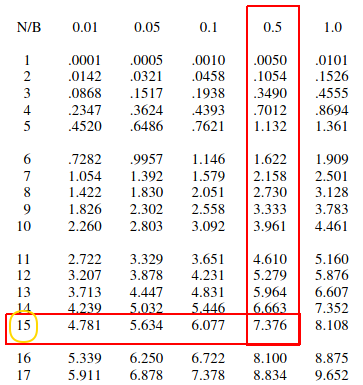

$$
c \geq 15
$$

### 4.7 ¿Cuántas líneas son necesarias si la probabilidad de recibir la señal de congestión es de 0.01?

$$
B[c,a] = p_c
\\
\Rightarrow B[c,7] \leq 0.01
\\
\Rightarrow B[c,7] \leq 1\text{%}
\\
\Rightarrow c \geq 14
$$

### 4.8 Si tuviéramos 10 servidores en lugar de 4, ¿Cuál sería la probabilidad de obtener un bloqueo?

$$
B[c,a] = \frac{a^c}{c!} (\sum_{n=0}^c \frac{a^n}{n!})^{-1}
\\
\Rightarrow B[10,7] = \frac{7^{10}}{10!} (\sum_{n=0}^{10} \frac{7^n}{n!})^{-1}
\\
\Rightarrow B[10,7] = p_c  \approx 0.079
$$

## 5. Ejercicio ilustrativo

Se pretende mejorar el rendimiento de un laboratorio de computación. El sistema tiene las siguientes características: 3 computadores, los usuarios acceden al laboratorio (distribución poissoniana) con una tasa de 5 usuarios/hora. El tiempo de utilización de cada computador es exponencial de media 2 horas. Cuando un usuario encuentra todos los puestos ocupados abandona la sala. Determinar el número de computadoras a adquirir si se desea triplicar el número medio de usuarios en el laboratorio